<h1>Hough transform</h1>


(np.float64(-0.5), np.float64(599.5), np.float64(599.5), np.float64(-0.5))

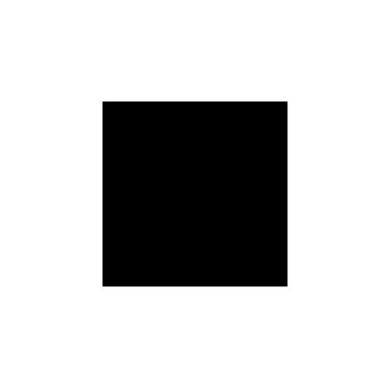

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
image = cv2.imread('black.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.axis('off')

(np.float64(-0.5), np.float64(1023.5), np.float64(708.5), np.float64(-0.5))

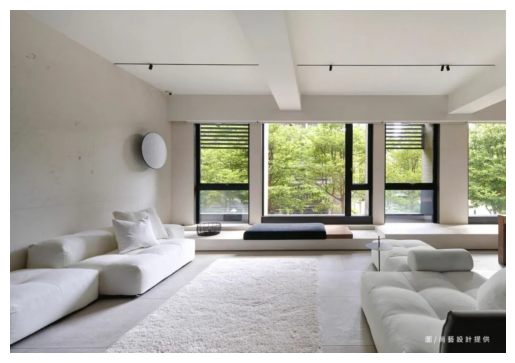

In [2]:
image1= cv2.imread('img.jpg')
image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
plt.imshow(image1)
plt.axis('off')

<h3>Performing Edge detection</h3>

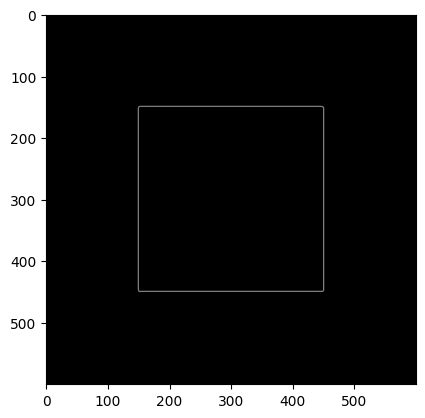

In [3]:
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
low_threshold = 50
high_threshold = 100
edges = cv2.Canny(gray, low_threshold, high_threshold)
plt.imshow(edges, cmap='gray')

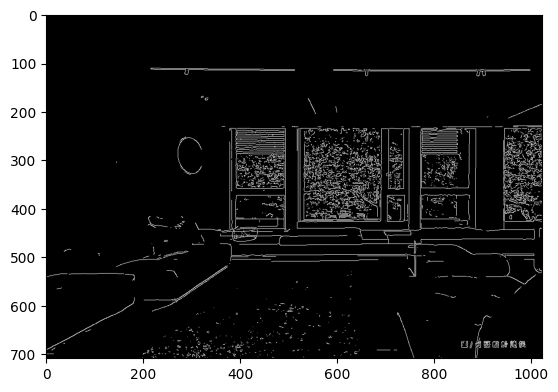

In [28]:
gray1 = cv2.cvtColor(image1, cv2.COLOR_RGB2GRAY)
low_threshold = 180
high_threshold = 200
edges1 = cv2.Canny(gray1, low_threshold, high_threshold)
plt.imshow(edges1, cmap='gray')

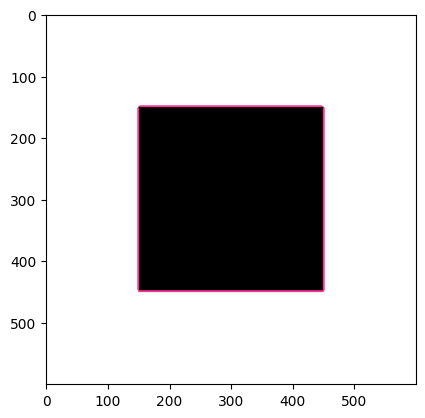

In [34]:
rho = 1
theta = np.pi/180
threshold = 50
min_line_length = 100
max_line_gap = 130
line_image = np.copy(image) 
lines = cv2.HoughLinesP(edges, rho, theta, threshold, np.array([]),
                        min_line_length, max_line_gap)
for line in lines:
    for x1,y1,x2,y2 in line:
        cv2.line(line_image,(x1,y1),(x2,y2),(255,50,150),2)
        
plt.imshow(line_image)

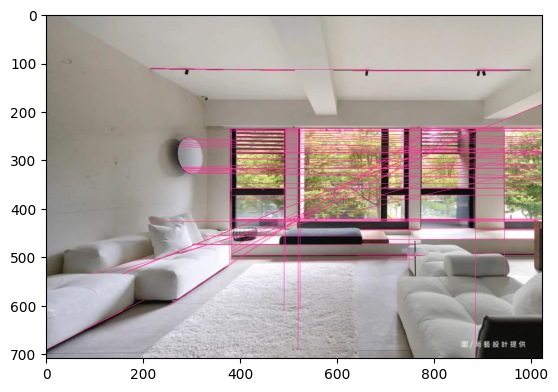

In [32]:
rho = 1
theta = np.pi/180
threshold = 100
min_line_length = 20
max_line_gap = 100
line_image1 = np.copy(image1) 
lines1 = cv2.HoughLinesP(edges1, rho, theta, threshold, np.array([]),
                        min_line_length, max_line_gap)
for line in lines1:
    for x1,y1,x2,y2 in line:
        cv2.line(line_image1,(x1,y1),(x2,y2),(255,50,150),1)
        
plt.imshow(line_image1)


<h1>Harris corner detection</h1>

<p>High-level pseudocode

1. Take the grayscale of the original image
2. Apply a Gaussian filter to smooth out any noise

3. Apply Sobel operator to find the x and y gradient values for every pixel in the grayscale image

4. For each pixel p in the grayscale image, consider a 3×3 window around it and compute the corner strength function. Call this its Harris value.

5. Find all pixels that exceed a certain threshold and are the local maxima within a certain window (to prevent redundant dupes of features)

6. For each pixel that meets the criteria in 5, compute a feature descriptor.<p>



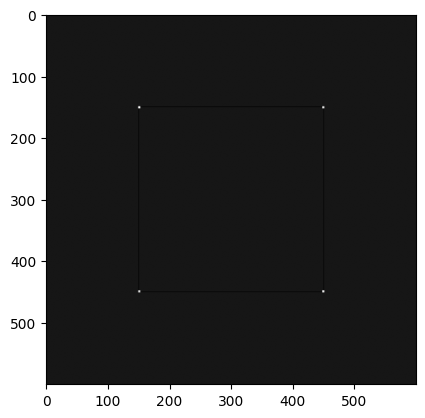

In [7]:
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
gray = np.float32(gray)
dst = cv2.cornerHarris(gray, 2, 3, 0.04)
dst = cv2.dilate(dst,None)
plt.imshow(dst, cmap='gray')

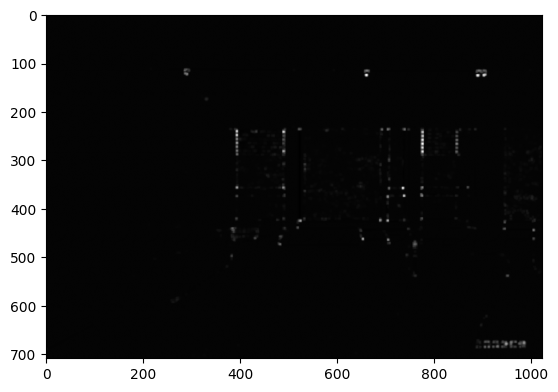

In [17]:
gray1 = np.float32(gray1)
dst1 = cv2.cornerHarris(gray1, 5, 5, 0.004)
dst1 = cv2.dilate(dst1,None)
plt.imshow(dst1, cmap='gray')

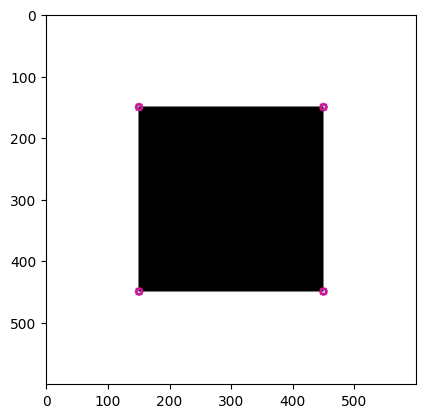

In [9]:
thresh = 0.1*dst.max()
corner_image = np.copy(image)

for j in range(0, dst.shape[0]):
    for i in range(0, dst.shape[1]):
        if(dst[j,i] > thresh):
            cv2.circle( corner_image, (i, j), 5, (200,25,150), 1)

plt.imshow(corner_image)

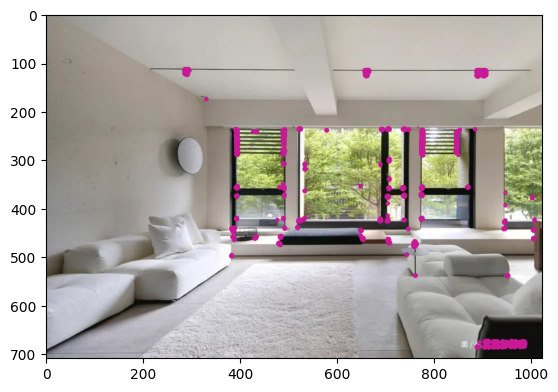

In [19]:
thresh1 = 0.1*dst1.max()


corner_image = np.copy(image1)

for j in range(0, dst1.shape[0]):
    for i in range(0, dst1.shape[1]):
        if(dst1[j,i] > thresh1):
            cv2.circle( corner_image, (i, j), 3, (200,25,150), 1)

plt.imshow(corner_image)